# **COVID19 - "Symptoms Cloud"**

In this notebook, I have used the [COVID-19 News Articles Open Research Dataset](http://https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26) to explore the process of creating generalized and localized word cloud task. 

**What is a Word Cloud?** 

It is a visual representation of the text data, usually words, the size of which depends upon the frequency of the word in the text. It is generally used to know what the text is talking about.
* **Generalized Word Cloud:** This helps us to get a sense of the overall meaning/context of the underlying text.
* **Localized Word Cloud:** This technique can be used to understand the context of a specific theme in a large text corpus.

Here I used a fancy term called **Symptoms Cloud**, it is nothing but the localized word cloud technique used to understand the context around the theme **"Symptoms"**.

In [27]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv("/kaggle/input/cbc-news-coronavirus-articles-march-26/news.csv")
print(data.shape)
data.head()

(6788, 7)


,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...


Here, we need only the cotnent of the news articles because usually the indepth matters like causes, symptoms, precautions, etc. are discussed in the content of the articles only.

### Preprocessing the Text data 
Next step is to clean the text data. This is the most important part in any NLP task. The text data contains lot of junks which doesn't add any meaning to the text such as stopwords, punctuations, urls, colloquial usage words, etc.
The funcion defined below does the following cleaning:
* Removing digits, urls, stopwords
* Converting to lower case
* Deleting bad symbols, replacing punctuations by space, etc
* It also has a custom made stoplist which contains additional stopwords which the **stopwords** package from nltk does not include

In [4]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

#Custom Stoplist
stoplist = ["i","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)

# Function to preprocess the text
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

# Cleaning the "text" column in the data frame using the above defined function
df_text = data["text"].astype(str).apply(text_prepare)
df_text.head()

0    lily overacker laurell pallot start gay straig...
1    excerpt second opinion weekly roundup eclectic...
2    latest lives behind numbers first covid deaths...
3    b c provincial health officer dr bonnie henry ...
4    b c provincial health officer dr bonnie henry ...
Name: text, dtype: object

In [5]:
text = " ".join(sent for sent in df_text)
print("There are {} words in the text.".format(len(text)))

There are 21065504 words in the text.


### Generalized Word Cloud
We will use the WordCloud package in python to plot the word cloud. Some of the most common parameters in the function is:
* **max_words:** - Used to set the word limit in the word cloud.
* **height:** - Used to set the height of the plot
* **width:** - Used to set the width of the plot
* **collocations:** - Used to set whether to include collocations (bigrams) of two words
* **stopwords:** - Used to remove words from the plot

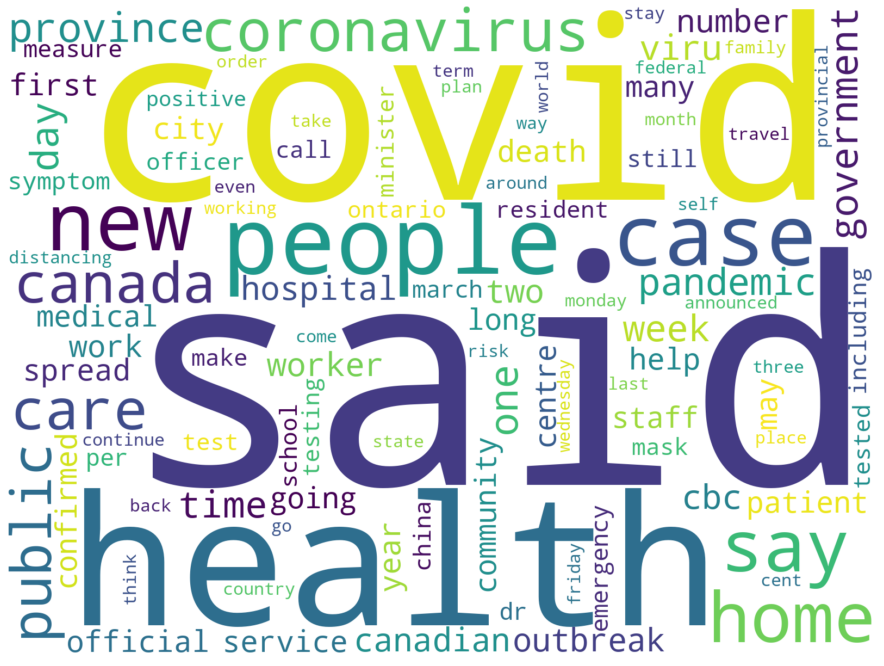

In [6]:
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

From this above word cloud, we can say that the main theme behind the text is about Covid, people and health. But we cannot get the details about the sub-themes like symptoms etc.

### Localized Word Cloud - Unigram
In order to zero-in on our requirement (finding the context around the theme "symptom"), we have to focus our search around the word symptoms and extract subset of sentence. For example, using a focus window of +/-6 words around the word "symptoms" and creating a text corpus using the same.

In [7]:
# Creating a subset of sentence using the window method

text_tok = text.split()
indices = (i for i, word in enumerate(text_tok) if word == "symptom" or word=="symptoms")
neighbors=[]
for ind in indices:
    neighbors.append(text_tok[ind-6:ind]+ text_tok[ind:ind+6])

neighbors_sent=[]
for i in neighbors:
    sent = " ".join(i)
    neighbors_sent.append(sent)

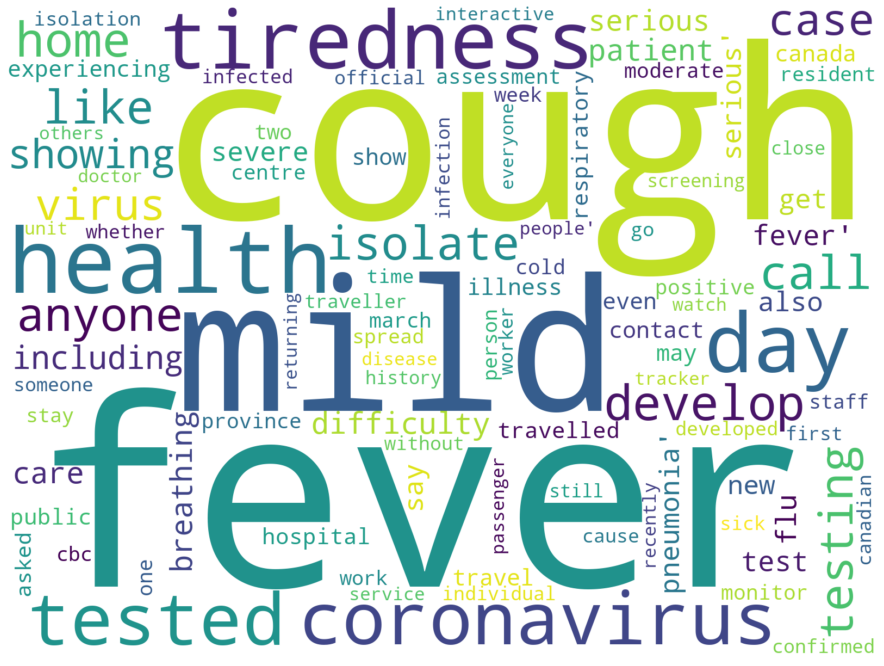

In [8]:
# Unigram symptom cloud
wordcloud = WordCloud(stopwords = ["symptoms","symptom", "covid", "people", "include","said", "self", "common"], background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(str(neighbors_sent))
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Now, from the word cloud we could see that the most important symptoms for COVID is fever, cough, tiredness, etc. This is really great compared to the generalized word cloud. We can still go ahead and plot the localized Bigram word cloud to make the context more clear.

### Localized Word Cloud - Bigram


In [9]:
# Preprocessing for Bigram cloud

bigram_corpus = str(neighbors_sent).split(",")

cv = CountVectorizer(max_features = 1000,ngram_range=(2,2), min_df=3)
X = cv.fit_transform(bigram_corpus)

bigram_df = pd.DataFrame(data = np.column_stack([cv.get_feature_names(),X.toarray().sum(axis=0)]))
bigram_df.tail()

,0,1
995,world health,11
996,worsening cough,7
997,worsening symptoms,45
998,year old,14
999,york st,16


In [22]:
# bigram_text = " ".join(i for i in bigram_df.iloc[:,0])
bigram_df.iloc[:,1] = bigram_df.iloc[:,1].astype(int)
bigram_df = bigram_df[~(bigram_df.iloc[:,0].str.contains("symptoms") | bigram_df.iloc[:,0].str.contains("covid") | bigram_df.iloc[:,0].str.contains("isolate") | bigram_df.iloc[:,0].str.contains("include") | bigram_df.iloc[:,0].str.contains("including"))]

In [23]:
bigram_dict = dict(zip(bigram_df.iloc[:,0], bigram_df.iloc[:,1]))
bigram_dict

{'able board': 8,
 'aches pains': 8,
 'across canada': 7,
 'admitted hospital': 13,
 'adults people': 9,
 'advised call': 7,
 'advised self': 7,
 'advises people': 9,
 'age area': 16,
 'agency canada': 12,
 'ahead people': 19,
 'airport screening': 10,
 'alberta health': 35,
 'albertans returned': 9,
 'allowed board': 15,
 'also said': 10,
 'also self': 10,
 'also spread': 14,
 'also telehealth': 13,
 'also tested': 14,
 'also visit': 22,
 'although government': 7,
 'anyone concerned': 20,
 'anyone develops': 7,
 'anyone exhibiting': 10,
 'anyone experiencing': 7,
 'anyone live': 7,
 'anyone mbq': 22,
 'anyone mohawks': 14,
 'anyone returning': 13,
 'anyone showing': 24,
 'anyone two': 16,
 'area chronic': 16,
 'arriving canada': 10,
 'asked call': 14,
 'asked monitor': 10,
 'asked self': 51,
 'asked stay': 32,
 'assessment centre': 22,
 'assessment centres': 10,
 'assessment government': 9,
 'assessment questionnaire': 19,
 'assessment tool': 56,
 'authorities within': 7,
 'away anyon

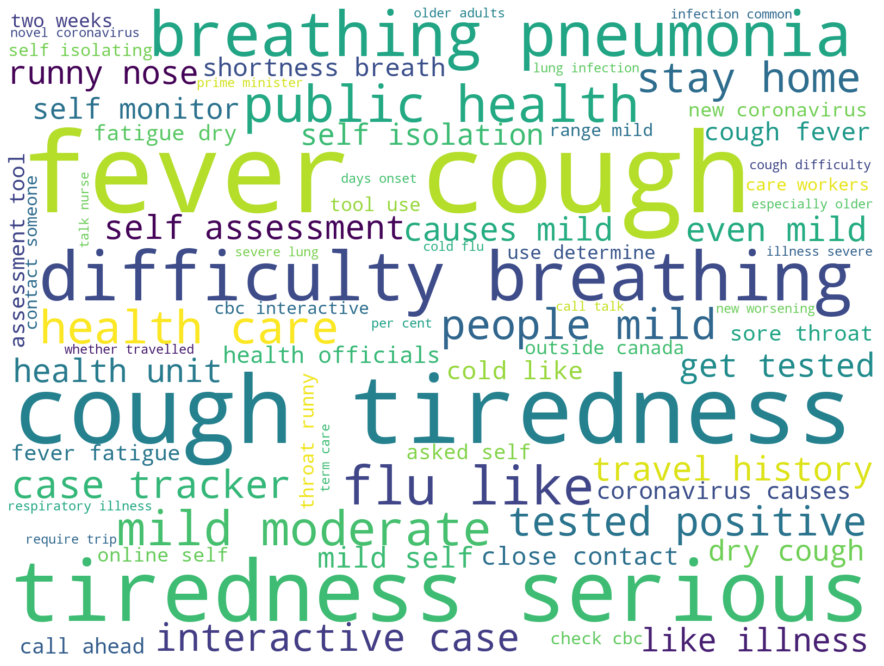

In [26]:
wordcloud = WordCloud(stopwords = ["symptoms","symptom", "covid", "people", "include","said", "self", "common"], background_color = "white", height=1200, width= 1600, collocations=False , max_words=70).generate_from_frequencies(bigram_dict)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

This Bigram cloud gives more context and meaning compared to the unigram cloud.

This concludes the process explanation for plotting the generalized and localized word clouds using a simple example of COVID dataset.

Happy Learning !!!